# MNIST — Handwritten Digit Recognition

This notebook demonstrates a simple convolutional neural network (CNN) trained on the MNIST dataset.
Steps: load the dataset, preprocess (normalize and reshape), build a small CNN, train, evaluate, and show sample predictions.

## 1. Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.15.0


## 2. Load MNIST Dataset

The MNIST dataset contains 60,000 training images and 10,000 test images of handwritten digits (28x28 pixels, grayscale).

In [3]:
# Load the dataset (built into Keras)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print('Training set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)
print('Pixel value range:', x_train.min(), 'to', x_train.max())

11490434/11490434 [==============================] - 9s 1us/step
Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)
Pixel value range: 0 to 255
Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)
Pixel value range: 0 to 255


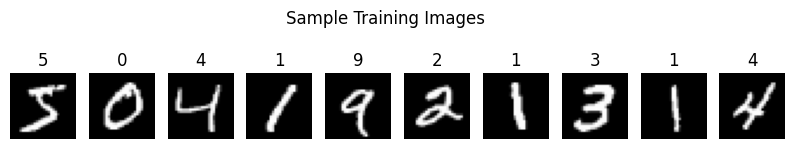

In [4]:
# Display a few sample images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.suptitle('Sample Training Images')
plt.show()

## 3. Preprocess the Data

- Normalize pixel values from [0, 255] to [0, 1]
- Reshape to add channel dimension for CNN (28, 28) → (28, 28, 1)

In [5]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add channel dimension (required for Conv2D)
x_train = np.expand_dims(x_train, axis=-1)  # Shape: (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)    # Shape: (10000, 28, 28, 1)

print('After preprocessing:')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('Pixel range:', x_train.min(), 'to', x_train.max())

After preprocessing:
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
Pixel range: 0.0 to 1.0


## 4. Build Neural Network Architecture

We'll use a simple CNN with:
- 2 Convolutional layers with MaxPooling
- Flatten layer
- Dense (fully connected) layers for classification

In [6]:
model = keras.Sequential([
    # First convolutional block
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Second convolutional block
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Flatten and dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (Non

## 5. Compile the Model

Configure the model with:
- Optimizer: Adam (adaptive learning rate)
- Loss: Sparse categorical crossentropy (for integer labels)
- Metrics: Accuracy

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print('Model compiled successfully!')


Model compiled successfully!
Model compiled successfully!


## 6. Train the Model

Train for 5 epochs with a validation split to monitor performance.

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/5




422/422 - 18s - loss: 0.2490 - accuracy: 0.9290 - val_loss: 0.0644 - val_accuracy: 0.9830 - 18s/epoch - 42ms/step
Epoch 2/5
422/422 - 18s - loss: 0.2490 - accuracy: 0.9290 - val_loss: 0.0644 - val_accuracy: 0.9830 - 18s/epoch - 42ms/step
Epoch 2/5
422/422 - 17s - loss: 0.0639 - accuracy: 0.9804 - val_loss: 0.0492 - val_accuracy: 0.9860 - 17s/epoch - 40ms/step
Epoch 3/5
422/422 - 17s - loss: 0.0639 - accuracy: 0.9804 - val_loss: 0.0492 - val_accuracy: 0.9860 - 17s/epoch - 40ms/step
Epoch 3/5
422/422 - 18s - loss: 0.0472 - accuracy: 0.9856 - val_loss: 0.0394 - val_accuracy: 0.9877 - 18s/epoch - 43ms/step
Epoch 4/5
422/422 - 18s - loss: 0.0472 - accuracy: 0.9856 - val_loss: 0.0394 - val_accuracy: 0.9877 - 18s/epoch - 43ms/step
Epoch 4/5
422/422 - 35s - loss: 0.0372 - accuracy: 0.9886 - val_loss: 0.0367 - val_accuracy: 0.9890 - 35s/epoch - 84ms/step
422/422 - 35s - loss: 0.0372 - accuracy: 0.9886 - val_loss: 0.0367 - val_accuracy: 0.9890 - 35s/epoch - 84ms/step
Epoch 5/5
Epoc

## 7. Visualize Training History

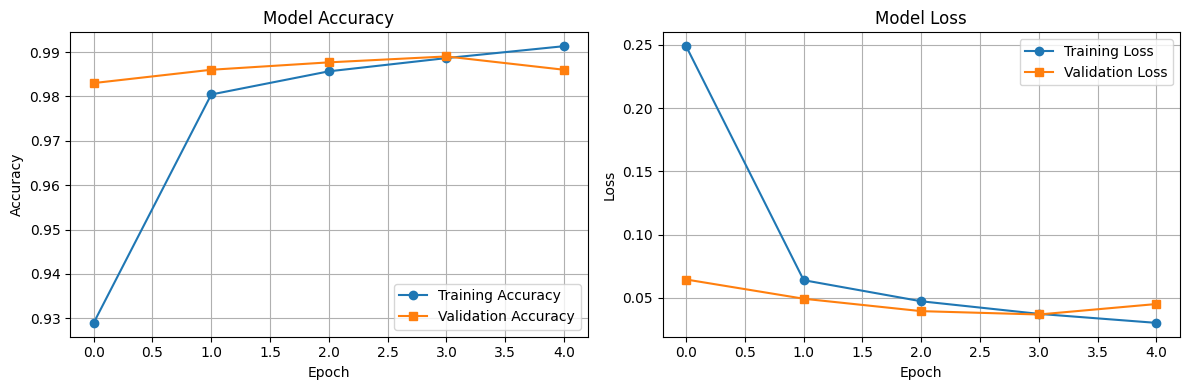

In [9]:
# Plot accuracy and loss
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Loss plot
axes[1].plot(history.history['loss'], label='Training Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Validation Loss', marker='s')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 8. Evaluate on Test Set

Test the trained model on unseen data.

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f'\n=== Test Results ===')
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')

313/313 - 2s - loss: 0.0441 - accuracy: 0.9864 - 2s/epoch - 5ms/step

=== Test Results ===
Test Loss: 0.0441
Test Accuracy: 0.9864 (98.64%)

=== Test Results ===
Test Loss: 0.0441
Test Accuracy: 0.9864 (98.64%)


## 9. Sample Predictions

Visualize predictions on test images.

1/1 [==============================] - 0s 141ms/step


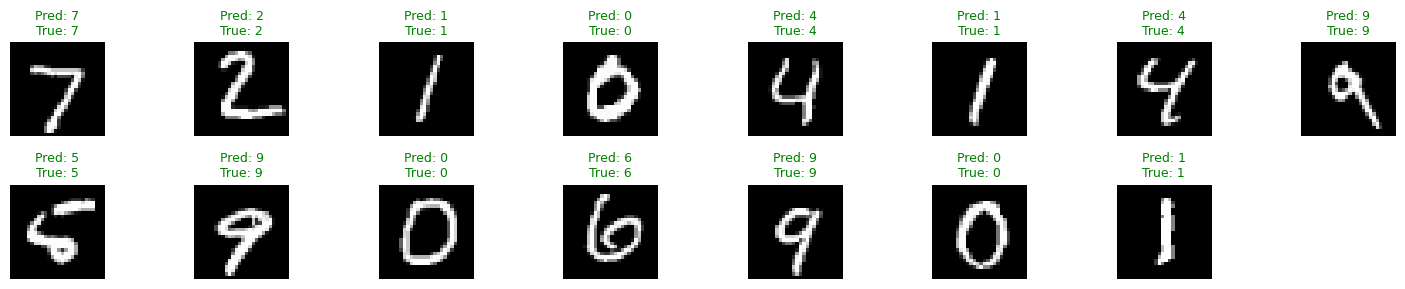


Detailed prediction for first test image:
True label: 7
Predicted label: 7
Confidence scores for each digit:
  Digit 0: 0.00%
  Digit 1: 0.00%
  Digit 2: 0.00%
  Digit 3: 0.00%
  Digit 4: 0.00%
  Digit 5: 0.00%
  Digit 6: 0.00%
  Digit 7: 100.00%
  Digit 8: 0.00%
  Digit 9: 0.00%


In [11]:
# Make predictions on first 15 test images
predictions = model.predict(x_test[:15])
predicted_labels = np.argmax(predictions, axis=1)

# Display images with predictions
plt.figure(figsize=(15, 3))
for i in range(15):
    plt.subplot(2, 8, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    
    # Color code: green if correct, red if wrong
    color = 'green' if predicted_labels[i] == y_test[i] else 'red'
    plt.title(f'Pred: {predicted_labels[i]}\nTrue: {y_test[i]}', color=color, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print detailed prediction for first image
print('\nDetailed prediction for first test image:')
print('True label:', y_test[0])
print('Predicted label:', predicted_labels[0])
print('Confidence scores for each digit:')
for digit in range(10):
    print(f'  Digit {digit}: {predictions[0][digit]*100:.2f}%')

## 10. Save the Model (Optional)

In [12]:
import os

# Create output directory
output_dir = 'neural_networks/output'
os.makedirs(output_dir, exist_ok=True)

# Save the model
model_path = os.path.join(output_dir, 'mnist_cnn_model.h5')
model.save(model_path)

print(f'Model saved to: {model_path}')

Model saved to: neural_networks/output\mnist_cnn_model.h5


c:\Users\jeff\Projects\deep-learning\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
